In [2]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


151.15063334616008 147.87878155730428 2.3399047173455676


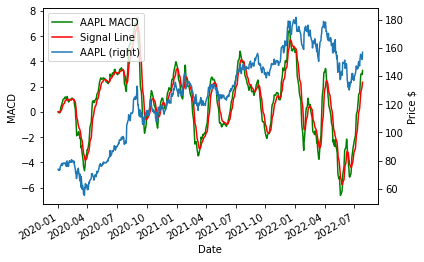

In [3]:
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt

start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()
ticker = pdr.get_data_yahoo("AAPL", start, end)['Adj Close']

exp1 = ticker.ewm(span=12, adjust=False).mean()
exp2 = ticker.ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
print(exp1[-1],exp2[-1],exp3[-1])
macd.plot(label='AAPL MACD', color='g')
ax = exp3.plot(label='Signal Line', color='r')
ticker.plot(ax=ax, secondary_y=True, label='AAPL')

ax.set_ylabel('MACD')
ax.right_ax.set_ylabel('Price $')
ax.set_xlabel('Date')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left')
plt.show()